In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [14]:
df = pd.read_csv('StudentsPerformance (1).csv')
df.info()
df.describe()
df.isnull().sum()
df.head()
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score'] / 3
print(df[['total score', 'average score']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
   total score  average score
0          218      72.666667
1          247      82.333333
2          278      92.666667
3          148      49.333333
4          229      76.333333


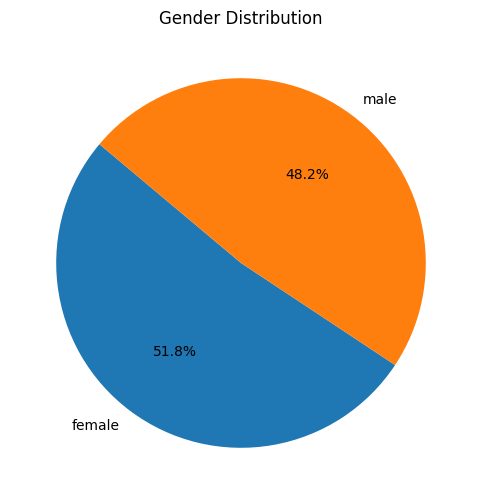

In [15]:
# gender distribution
plt.figure(figsize=(8,6))
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()  

In [21]:
# statistical summary
print(df[['math score', 'reading score', 'writing score', 'average score']].describe())

       math score  reading score  writing score  average score
count  1000.00000    1000.000000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000      67.770667
std      15.16308      14.600192      15.195657      14.257326
min       0.00000      17.000000      10.000000       9.000000
25%      57.00000      59.000000      57.750000      58.333333
50%      66.00000      70.000000      69.000000      68.333333
75%      77.00000      79.000000      79.000000      77.666667
max     100.00000     100.000000     100.000000     100.000000


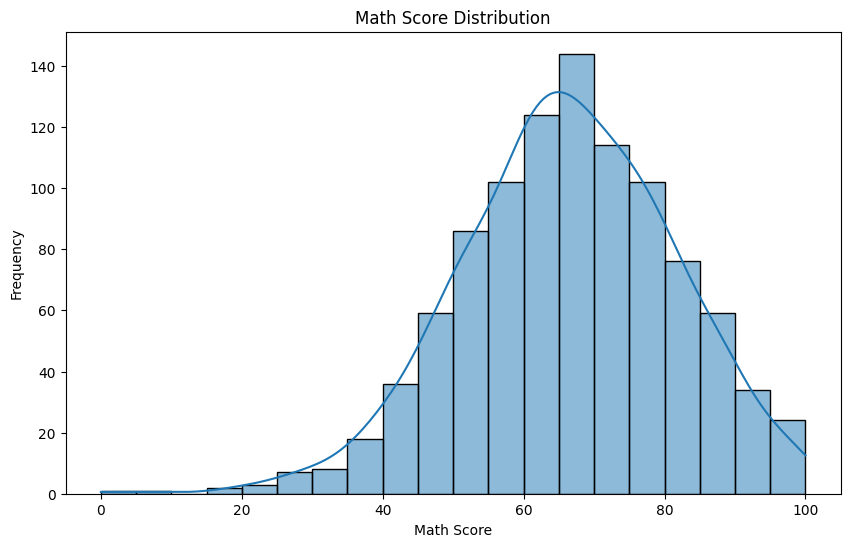

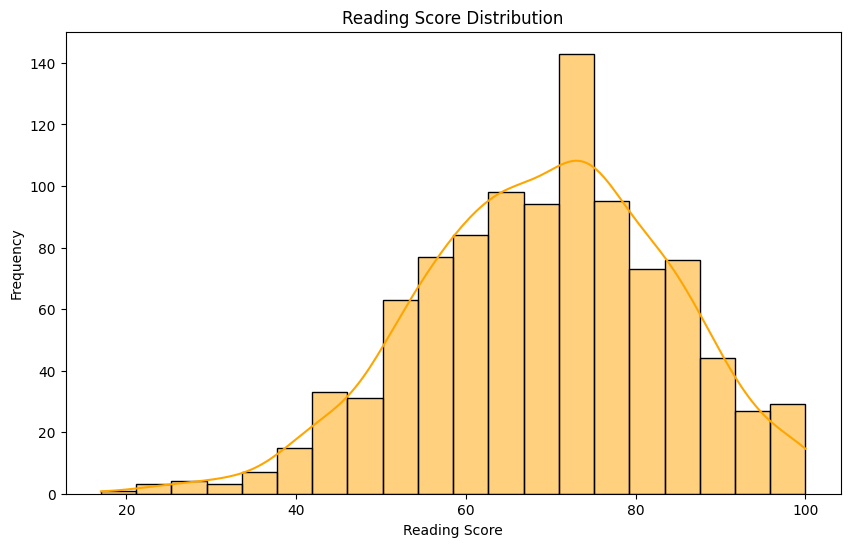

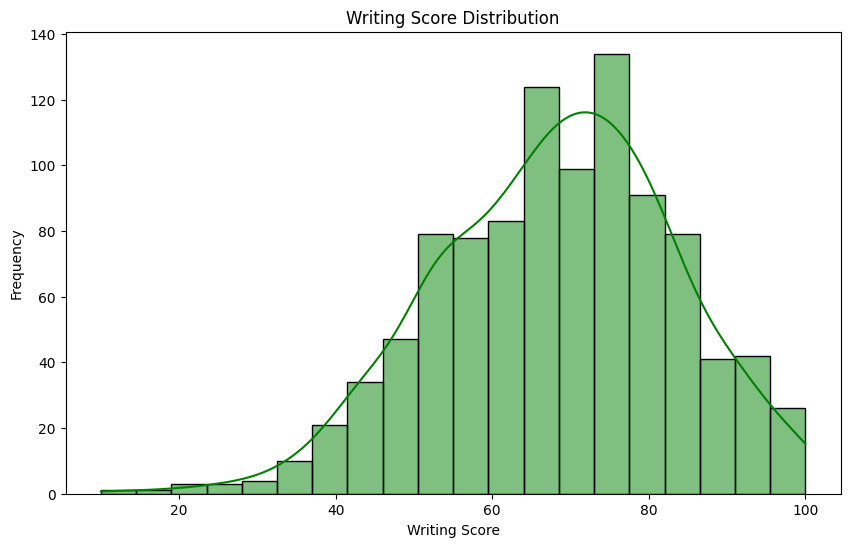

In [22]:
# math score distribution
plt.figure(figsize=(10,6))
sns.histplot(df['math score'], bins=20, kde=True)
plt.title('Math Score Distribution')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()
# reading score distribution
plt.figure(figsize=(10,6))
sns.histplot(df['reading score'], bins=20, kde=True, color='orange')
plt.title('Reading Score Distribution')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.show()
# writing score distribution
plt.figure(figsize=(10,6))
sns.histplot(df['writing score'], bins=20, kde=True, color='green')
plt.title('Writing Score Distribution')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.show()


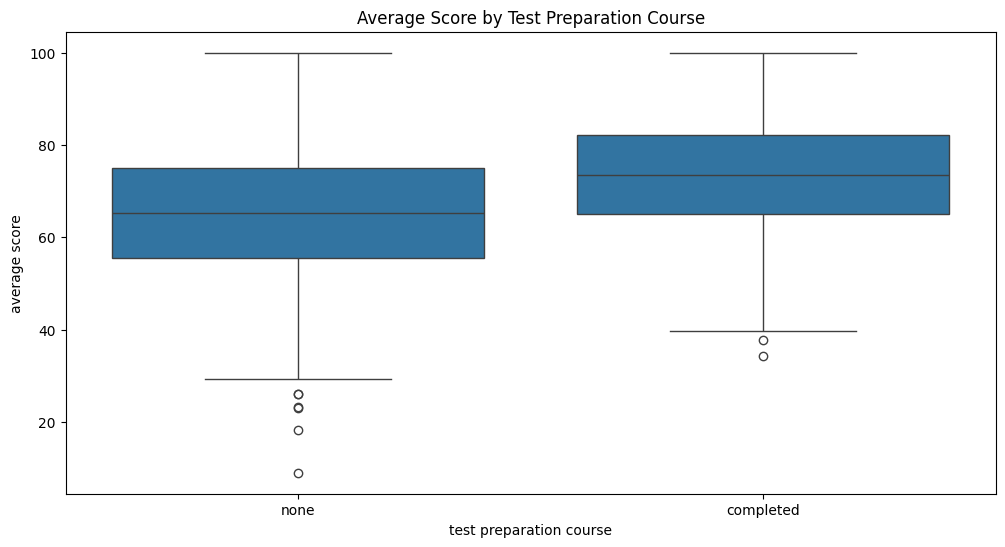

In [26]:
# boxplot of scores by test preparation course
plt.figure(figsize=(12,6))
sns.boxplot(x='test preparation course', y='average score', data=df)
plt.title('Average Score by Test Preparation Course')
plt.show()


In [24]:
# t-test for average scores based on test preparation course
completed = df[df['test preparation course'] == 'completed']['average score']
none = df[df['test preparation course'] == 'none']['average score']
t_stat, p_value = stats.ttest_ind(completed, none)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")
if p_value < 0.05:
    print("There is a significant difference in average scores based on test preparation course.")
else:
    print("No significant difference in average scores based on test preparation course.")


T-test results: t-statistic = 8.390944443482592, p-value = 1.633780203592351e-16
There is a significant difference in average scores based on test preparation course.


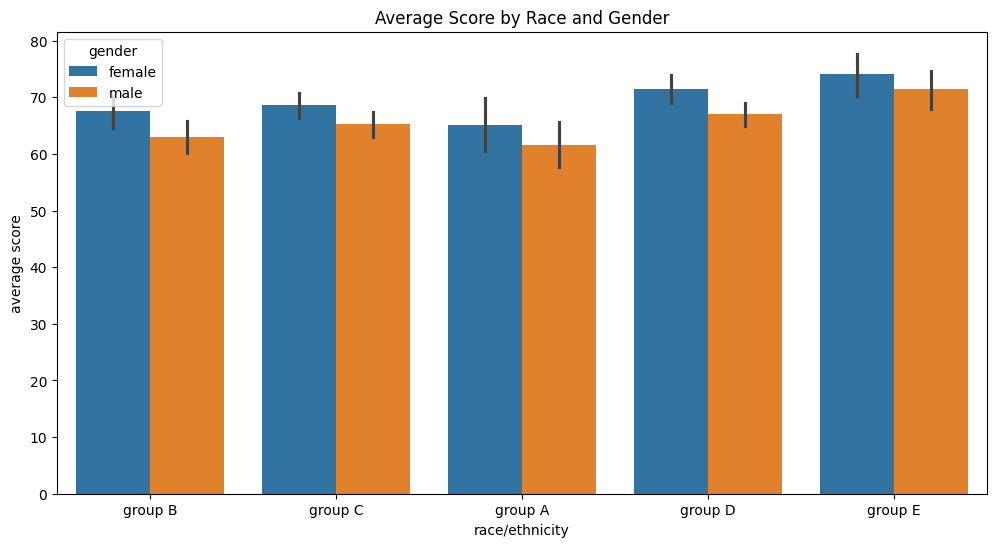

In [27]:
#race/ethnicity vs average score vs gender
plt.figure(figsize=(12,6))
sns.barplot(x='race/ethnicity', y='average score', hue='gender', data=df)
plt.title('Average Score by Race and Gender')
plt.show()  


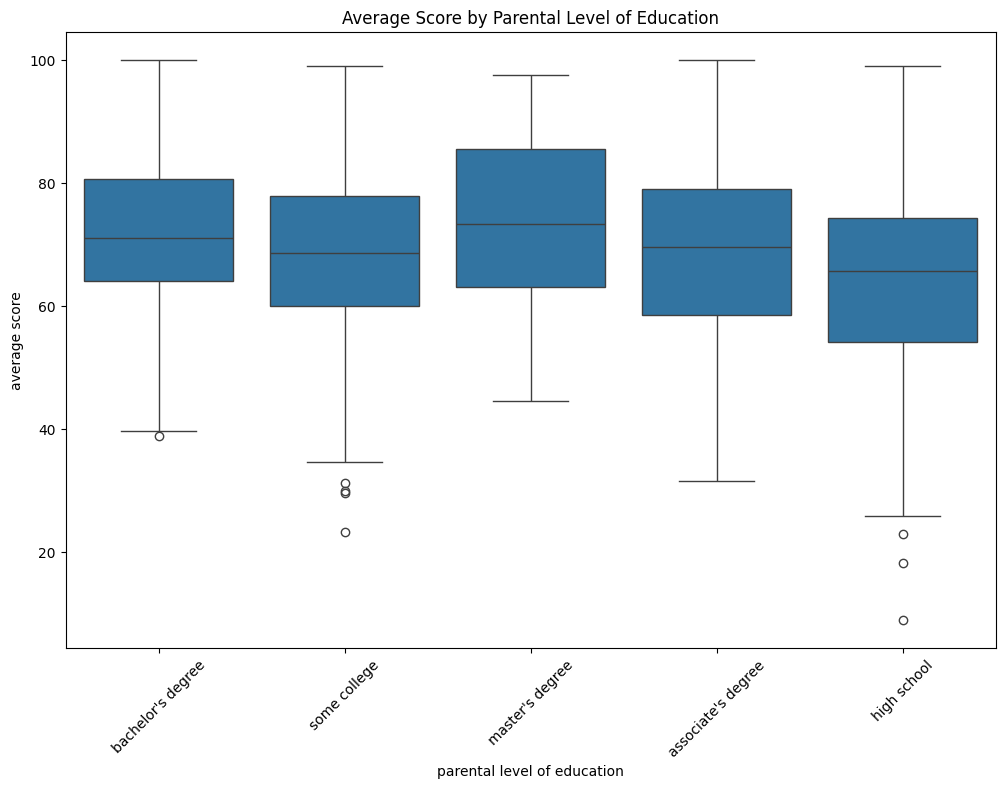

In [35]:
# scores by parental level of education
plt.figure(figsize=(12,8))
sns.boxplot(x='parental level of education', y='average score', data=df)
plt.title('Average Score by Parental Level of Education')
plt.xticks(rotation=45)
plt.show()

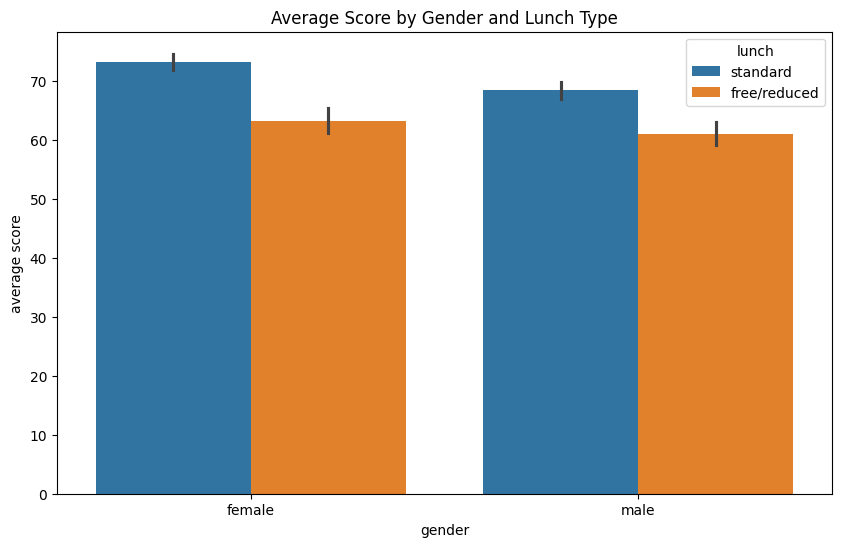

In [36]:
# gender vs lunch vs average score
plt.figure(figsize=(10,6))
sns.barplot(x='gender', y='average score', hue='lunch', data=df)
plt.title('Average Score by Gender and Lunch Type')
plt.show()  


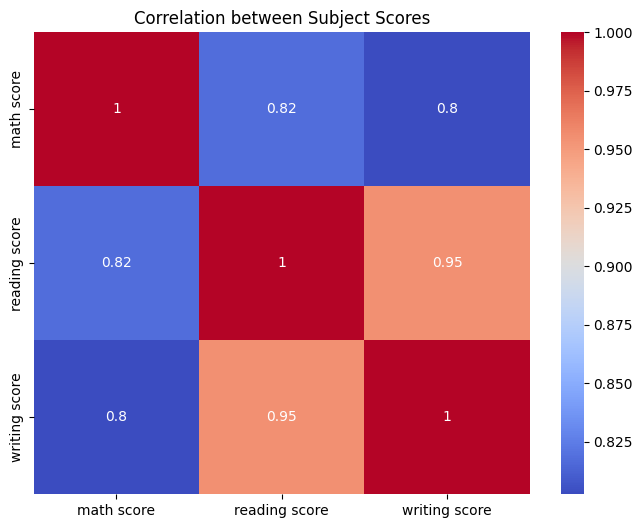

In [37]:
# correlation between subject scores
corr = df[['math score', 'reading score', 'writing score']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Subject Scores')
plt.show()

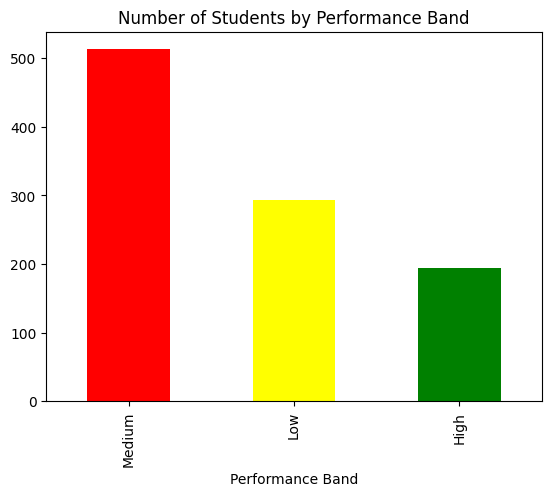

In [39]:
#create  performance level based on average score
bins = [0, 60, 80, 100]
labels = ['Low', 'Medium', 'High']
df['performance_band'] = pd.cut(df['average score'], bins=bins, labels=labels, include_lowest=True)

df['performance_band'].value_counts().plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Number of Students by Performance Band')
plt.xlabel('Performance Band')
plt.show()


In [47]:
#group by gender,race/ethnicity and test preparation
grouped = df.groupby(['gender', 'race/ethnicity', 'test preparation course'])['average score'].mean().unstack()
print(grouped)


test preparation course  completed       none
gender race/ethnicity                        
female group A           73.777778  60.805556
       group B           70.542857  65.971014
       group C           74.082126  65.168168
       group D           75.174242  69.505882
       group E           80.250000  70.762963
male   group A           67.719298  58.088235
       group B           70.747475  58.176101
       group C           68.687500  63.435897
       group D           71.631579  65.129825
       group E           74.324074  68.552381


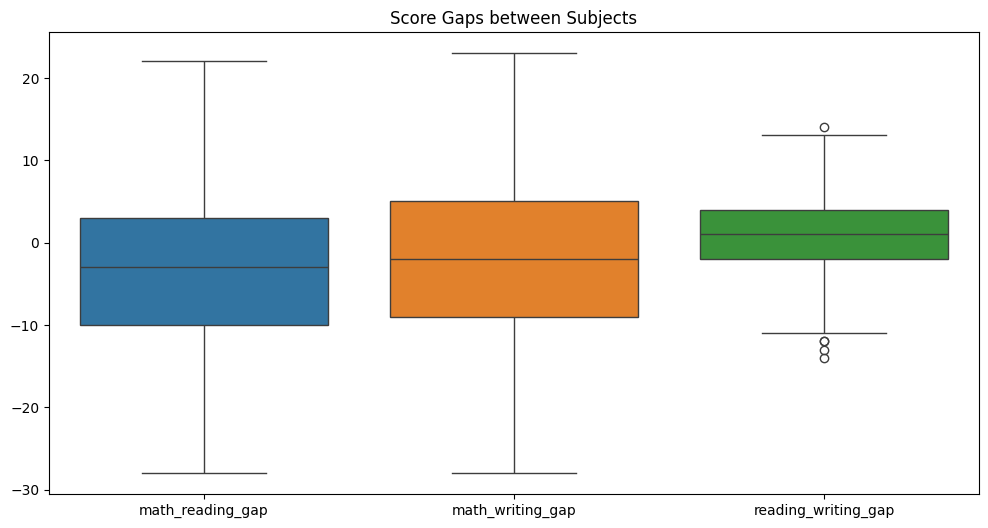

In [48]:
#reading score vs writing score vs math score
df['math_reading_gap'] = df['math score'] - df['reading score']
df['math_writing_gap'] = df['math score'] - df['writing score']
df['reading_writing_gap'] = df['reading score'] - df['writing score']

df[['math_reading_gap','math_writing_gap','reading_writing_gap']].describe()
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['math_reading_gap','math_writing_gap','reading_writing_gap']])
plt.title('Score Gaps between Subjects')
plt.show()
